In [1]:
# Importing necessary libraries
import os, io
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import tensorflow as tf
import warnings
import time

# Ignoring warnings
warnings.filterwarnings('ignore')

In [2]:
# Downloading the Spanish-English dataset
zip_file = tf.keras.utils.get_file(
    'spa-eng.zip', origin='http://storage.googleapis.com/download.tensorflow.org/data/spa-eng.zip',
    extract=True)

# Setting the file path for the downloaded dataset
file_path = os.path.dirname(zip_file)+"/spa-eng/spa.txt"

2638744/2638744 [==============================] - 0s 0us/step


In [3]:
# Mounting Google Drive for access in Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Displaying the first 10 lines of the dataset (only works on jupyter/colab)

! head -10 /root/.keras/datasets/spa-eng/spa.txt


Go.	Ve.
Go.	Vete.
Go.	Vaya.
Go.	Váyase.
Hi.	Hola.
Run!	¡Corre!
Run.	Corred.
Who?	¿Quién?
Fire!	¡Fuego!
Fire!	¡Incendio!


In [5]:
# Function to load data from the file
def load_data(path, size=None):
    text = io.open(file_path, encoding='UTF-8').read()
    lines = text.splitlines()
    pairs = [line.split('\t') for line in lines]
    # lines =  # split the text into lines separated by newline # Insert Code Here ----
    # pairs =  # split each line into source and target using tabs # Insert Code Here ----

    # Extracting source and target sentences
    source = np.array([source for target, source in pairs]) # extract source text into a numpy array
    target = np.array([target for target, source in pairs]) # extract target text into a numpy array

    return source, target

In [6]:
# Loading source and target sentences
src_sentences, tgt_sentences = load_data(file_path)
print("Original Sentence:",src_sentences[422])
print("Translated Sentence:",tgt_sentences[422])

Original Sentence: ¿Quién se calló?
Translated Sentence: Who fell?


In [7]:
# Creating a DataFrame from the loaded data
df = pd.DataFrame(zip(src_sentences, tgt_sentences), columns=['source_sentence', 'target_sentence'])
df

,source_sentence,target_sentence
0,Ve.,Go.
1,Vete.,Go.
2,Vaya.,Go.
3,Váyase.,Go.
4,Hola.,Hi.
...,...,...
118959,Hay cuatro causas principales de muertes relac...,There are four main causes of alcohol-related ...
118960,Hay madres y padres que se quedan despiertos d...,There are mothers and fathers who will lie awa...
118961,Una huella de carbono es la cantidad de contam...,A carbon footprint is the amount of carbon dio...
118962,Como suele haber varias páginas web sobre cual...,Since there are usually multiple websites on a...


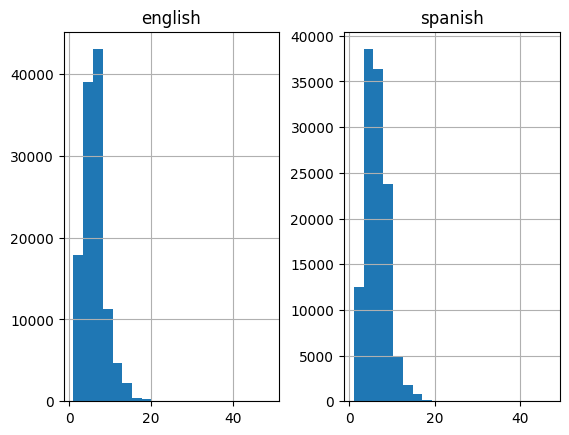

In [8]:
# Lists to hold sentence lengths
eng_len = []
span_len = []

# populate the lists with sentence lengths
for i in src_sentences:
      eng_len.append(len(i.split()))

for i in tgt_sentences:
      span_len.append(len(i.split()))

# Creating a DataFrame with sentence lengths
length_df = pd.DataFrame({'english': eng_len, 'spanish': span_len})

# Plotting histogram of sentence lengths
length_df.hist(bins=20)
plt.show()


In [9]:
# Additional imports for text preprocessing and machine learning
import re, itertools
from collections import Counter
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import unicodedata

In [10]:
# Function to convert unicode to ascii
def unicode_to_ascii(s):
    normalized = unicodedata.normalize('NFD', s)
    return ''.join(c for c in normalized if unicodedata.category(c) != 'Mn')

# Function to preprocess text
def preprocess_text(text):
  text = unicode_to_ascii(text.lower().strip())
  text = re.sub(r"[^a-zA-Z?.!,¿]+", " ", text)
  text = re.sub(r"([?.!,¿])", r" \1 ", text)
  text = re.sub(r'[" "]+', " ", text)
  text = text.rstrip().strip()
  text = '<sos> ' + text + ' <eos>'

  return text

In [11]:
# Preprocessing sentences
print('Original sentence:',src_sentences[422])
prc_src_sentences = [preprocess_text(w) for w in src_sentences]
prc_tgt_sentences = [preprocess_text(w) for w in tgt_sentences]
print('Preprocessed sentence:',prc_src_sentences[422])

Original sentence: ¿Quién se calló?
Preprocessed sentence: <sos> ¿ quien se callo ? <eos>


In [12]:
# Function to tokenize sentences
def tokenize(sentences):
    lang_tokenizer = Tokenizer( filters='')
    lang_tokenizer.fit_on_texts(sentences)
    sequences = lang_tokenizer.texts_to_sequences(sentences)
    max_length = max(len(s) for s in sequences)
    sequences = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')

    return sequences, lang_tokenizer, max_length

In [13]:
# Function to load and tokenize sequences
def load_sequences(path, size=None):
    src_sentences, tgt_sentences = load_data(path)
    src_sentences = [preprocess_text(w) for w in src_sentences]
    tgt_sentences = [preprocess_text(w) for w in tgt_sentences]

    src_sequences,src_lang_tokenizer,max_length_src = tokenize(src_sentences)
    tgt_sequences,tgt_lang_tokenizer,max_length_trg = tokenize(tgt_sentences)

    return src_sequences, tgt_sequences, src_lang_tokenizer, tgt_lang_tokenizer, max_length_src, max_length_trg

In [14]:
# Loading and tokenizing the data
src_sequences, tgt_sequences, src_lang_tokenizer, tgt_lang_tokenizer, max_length_src, max_length_trg = load_sequences(file_path)
print("src sequences:",src_sequences.shape)
print("tgt sequences:",tgt_sequences.shape)
print("source maxlen:",max_length_src)
print("target maxlen:",max_length_trg)

src sequences: (118964, 53)
tgt sequences: (118964, 51)
source maxlen: 53
target maxlen: 51


In [15]:
# Displaying processed and tokenized data (spanish)
print("Original sentence:", src_sentences[422])
print("Text after preprocessing:", preprocess_text(src_sentences[422]))
print("Text after tokenization :", src_sequences[422])

Original sentence: ¿Quién se calló?
Text after preprocessing: <sos> ¿ quien se callo ? <eos>
Text after tokenization : [    1    12    79    16 10894    11     2     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0]


In [16]:
# Displaying processed and tokenized data (english)
print("Original sentence:", tgt_sentences[422])
print("Text after preprocessing:", preprocess_text(tgt_sentences[422]))
print("Text after tokenization :", tgt_sequences[422])

Original sentence: Who fell?
Text after preprocessing: <sos> who fell ? <eos>
Text after tokenization : [  1  80 483  10   2   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]


In [17]:
#Testing if the word to index / index to word mappings have been obtained correctly.
# Function to convert tokens to words
def convert(lang, tensor):
  for t in tensor:
    if t!=0:
      print ("%d ----> %s" % (t, lang.index_word[t]))

# Displaying index to word mappings
print ("Input Language; index to word mapping")
convert(src_lang_tokenizer, src_sequences[422])
print ()
print ("Target Language; index to word mapping")
convert(tgt_lang_tokenizer, tgt_sequences[422])

Input Language; index to word mapping
1 ----> <sos>
12 ----> ¿
79 ----> quien
16 ----> se
10894 ----> callo
11 ----> ?
2 ----> <eos>

Target Language; index to word mapping
1 ----> <sos>
80 ----> who
483 ----> fell
10 ----> ?
2 ----> <eos>


In [18]:
# getting the size of the input and output vocabularies.

src_vocab_size = len(src_lang_tokenizer.word_index)+1
tgt_vocab_size = len(tgt_lang_tokenizer.word_index)+1
print(src_vocab_size)
print(tgt_vocab_size)

24794
12934


In [19]:
# Splitting data into training and validation sets
source_sequences_train,source_sequences_val,tgt_sequences_train,tgt_sequences_val = train_test_split(src_sequences, tgt_sequences, shuffle=False, test_size=0.2)
print(len(source_sequences_train),len(source_sequences_val),len(tgt_sequences_train),len(tgt_sequences_val))

95171 23793 95171 23793


In [20]:

print(source_sequences_train[1])
print(source_sequences_val[1])
print(tgt_sequences_train[1])
print(tgt_sequences_val[1])

[   1 1321    3    2    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0]
[  1  29  21 315  18  94   8 549 440   3   2   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
[ 1 49  3  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0]
[  1   4 125   7  20  96   7  65  12 311 763   3   2   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]


In [21]:
#Defining hyperparameters
buffer_size=len(source_sequences_train)
val_buffer_size = len(source_sequences_val)
BATCH_SIZE = 64
embedding_dim = 128
units = 1024
steps_per_epoch = buffer_size//BATCH_SIZE
val_steps_per_epoch = val_buffer_size//BATCH_SIZE

In [22]:
# Preparing training and validation datasets
train_dataset = tf.data.Dataset.from_tensor_slices((source_sequences_train, tgt_sequences_train))

train_dataset = train_dataset.shuffle(buffer_size=buffer_size).batch(BATCH_SIZE)

val_dataset = tf.data.Dataset.from_tensor_slices((source_sequences_val, tgt_sequences_val))

val_dataset = val_dataset.batch(BATCH_SIZE)

In [23]:
# Getting shapes of example input and target batches
example_input_batch, example_target_batch = next(iter(train_dataset))
example_input_batch.shape, example_target_batch.shape

(TensorShape([64, 53]), TensorShape([64, 51]))

In [24]:

# Definition of the Encoder class as a subclass of tf.keras.Model
class Encoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, enc_units, batch_sz):
        super(Encoder, self).__init__()
        # Initialize encoder parameters
        self.batch_sz = batch_sz
        self.enc_units = enc_units
        # Embedding layer to transform input tokens to vectors
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        # GRU (Gated Recurrent Unit) layer
        self.gru = tf.keras.layers.GRU(self.enc_units,
                                       return_sequences=True,
                                       return_state=True,
                                       recurrent_initializer='glorot_uniform')

    # Function for the forward pass in the encoder
    def call(self, x, hidden):
        x = self.embedding(x)  # Pass input through embedding layer
        output, state = self.gru(x, initial_state=hidden)  # Pass embedded input through GRU
        return output, state

    # Function to initialize the hidden state of the GRU
    def initialize_hidden_state(self):
        return tf.zeros((self.batch_sz, self.enc_units))


In [25]:
# Bahdanau Attention mechanism
class BahdanauAttention(tf.keras.layers.Layer):
    def __init__(self, units):
        super(BahdanauAttention, self).__init__()
        # Dense layers for attention mechanism
        self.W1 = tf.keras.layers.Dense(units)
        self.W2 = tf.keras.layers.Dense(units)
        self.V = tf.keras.layers.Dense(1)

    # Function for the forward pass in Bahdanau attention
    def call(self, query, values):
        query_with_time_axis = tf.expand_dims(query, 1)
        # Calculate attention scores
        scores = self.V(tf.nn.tanh(self.W1(query_with_time_axis) + self.W2(values)))
        # Convert scores to probabilities
        attention_weights = tf.nn.softmax(scores, axis=1)
        # Calculate context vector as weighted sum of values
        context_vector = attention_weights * values
        context_vector = tf.reduce_sum(context_vector, axis=1)
        return context_vector, attention_weights

In [26]:
# Luong Attention mechanism
class LuongAttention(tf.keras.layers.Layer):
    def __init__(self, units):
        super(LuongAttention, self).__init__()

    # Function for the forward pass in Luong attention
    def call(self, query, values):
        # Calculate attention scores using dot-product
        scores = tf.matmul(query, values, transpose_b=True)
        # Convert scores to probabilities
        attention_weights = tf.nn.softmax(scores, axis=2)
        # Calculate context vector as weighted sum of values
        context_vector = tf.matmul(attention_weights, values)
        return context_vector, attention_weights


In [27]:

# Definition of the Decoder class as a subclass of tf.keras.Model
class Decoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, dec_units, batch_sz, attention_type):
        super(Decoder, self).__init__()
        # Initialize decoder parameters
        self.batch_sz = batch_sz
        self.dec_units = dec_units
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.gru = tf.keras.layers.GRU(self.dec_units,
                                       return_sequences=True,
                                       return_state=True,
                                       recurrent_initializer='glorot_uniform')
        self.fc = tf.keras.layers.Dense(vocab_size)

        # Choose the attention mechanism
        if attention_type == 'bahdanau':
            self.attention = BahdanauAttention(dec_units)
        elif attention_type == 'luong':
            self.attention = LuongAttention(dec_units)
        else:
            raise ValueError('Attention type must be "bahdanau" or "luong"')

    # Function for the forward pass in the decoder
    def call(self, x, hidden, enc_output):
        # Apply attention mechanism based on its type
        if isinstance(self.attention, BahdanauAttention):
            context_vector, attention_weights = self.attention(hidden, enc_output)
        elif isinstance(self.attention, LuongAttention):
            hidden_with_time_axis = tf.expand_dims(hidden, 1)
            context_vector, attention_weights = self.attention(hidden_with_time_axis, enc_output)

        x = self.embedding(x)  # Pass input through embedding layer
        # Get the sequence length from the embedding output
        seq_len = tf.shape(x)[1]

        # Expand the dimensions of context_vector to make it 3D
        #(fix for Bahdanau attention) comment if using Loung Attention
        context_vector = tf.expand_dims(context_vector, 1)

        # Repeat the context_vector to match the sequence length
        context_vector = tf.tile(context_vector, [1, seq_len, 1])

        # Concatenate the context_vector and the embedding output
        x = tf.concat([context_vector, x], axis=-1)
        #x = tf.concat([tf.expand_dims(context_vector, 1), x], axis=-1)

        output, state = self.gru(x)  # Pass concatenated vector through GRU
        output = tf.reshape(output, (-1, output.shape[2]))
        x = self.fc(output)  # Apply dense layer to generate predictions

        return x, state, attention_weights

In [28]:
# Instantiate encoder and decoder with specified parameters
encoder = Encoder(src_vocab_size, embedding_dim, units, BATCH_SIZE)
# to change attention change to 'luong' or 'bahdanau'
decoder = Decoder(tgt_vocab_size, embedding_dim, units, BATCH_SIZE, attention_type='bahdanau')


In [29]:
# Initialize the optimizer for the training process
# Adam optimizer used due to adaptive learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Initialize the loss function
# SparseCategoricalCrossentropy is commonly used in classification tasks where classes are mutually exclusive
# from_logits=True means the function expects unscaled logits as the model's output (before applying softmax)
# reduction='none' means the function won't reduce the loss values across dimensions; this is useful for masking
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='none')

# Define a custom loss function
def loss_function(real, pred):
    # Create a mask for non-zero inputs in the target
    # This is important to ignore loss from padding tokens in the target sequence
    mask = tf.math.logical_not(tf.math.equal(real, 0))

    # Compute the loss value between the real targets and predictions
    loss_ = loss_object(real, pred)

    # Cast the mask to the same data type as the loss, for element-wise multiplication
    mask = tf.cast(mask, dtype=loss_.dtype)

    # Apply the mask to the loss
    # This step zeroes out the loss from padding tokens in the target sequence
    loss_ *= mask

    # Return the mean loss after applying the mask
    # This gives the average loss across non-zero elements in the target
    return tf.reduce_mean(loss_)

# Set up checkpointing to save and restore the model's state
# useful for resuming training, preventing loss of progress in case of interruptions
checkpoint_dir = './content/drive/MyDrive/training_checkpoints_B'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")

# Initialize a checkpoint object with the optimizer and model components to be saved
checkpoint = tf.train.Checkpoint(optimizer=optimizer, encoder=encoder, decoder=decoder)


In [30]:
# Define training step
# Decorator to compile this function into a TensorFlow graph for efficiency
@tf.function
def train_step(inp, targ, enc_hidden):
    # Initialize the loss for this training step
    loss = 0

    # GradientTape records operations for automatic differentiation
    with tf.GradientTape() as tape:
        # Pass the input and initial hidden state to the encoder
        enc_output, enc_hidden = encoder(inp, enc_hidden)

        # Use the hidden state from the encoder as the initial hidden state for the decoder
        dec_hidden = enc_hidden

        # Create the initial decoder input (start token) for all examples in the batch
        dec_input = tf.expand_dims([tgt_lang_tokenizer.word_index['<sos>']] * BATCH_SIZE, 1)

        # Loop over each word in the target sequence
        for t in range(1, targ.shape[1]):
            # Run the decoder for one timestep using the current input and hidden state
            predictions, dec_hidden, _ = decoder(dec_input, dec_hidden, enc_output)

            # Calculate loss for this timestep's prediction against the actual target word
            loss += loss_function(targ[:, t], predictions)

            # Use the actual target word as the next input to the decoder
            dec_input = tf.expand_dims(targ[:, t], 1)

    # Calculate the average loss across all timesteps
    batch_loss = (loss / int(targ.shape[1]))

    # Collect all trainable variables from both encoder and decoder
    variables = encoder.trainable_variables + decoder.trainable_variables

    # Compute gradients of the loss with respect to the variables
    gradients = tape.gradient(loss, variables)

    # Apply the gradients to the optimizer, which will update the model
    optimizer.apply_gradients(zip(gradients, variables))

    # Return the loss for this training batch
    return batch_loss

In [31]:
# Define validation step
# Iterate over the target sequence
@tf.function
def val_step(inp, targ, enc_hidden):
    loss = 0
    enc_output, enc_hidden = encoder(inp, enc_hidden)
    dec_hidden = enc_hidden
    dec_input = tf.expand_dims([tgt_lang_tokenizer.word_index['<sos>']] * BATCH_SIZE, 1)

    # Iterate over the target sequence in validation
    for t in range(1, targ.shape[1]):
        predictions, dec_hidden, _ = decoder(dec_input, dec_hidden, enc_output)
        loss += loss_function(targ[:, t], predictions)
        dec_input = tf.expand_dims(targ[:, t], 1)

    batch_loss = (loss / int(targ.shape[1]))

    return batch_loss

In [32]:
def plot_graphs(epochs, train_loss_results, val_loss_results, epoch_times, batch_times):
    # Plot the learning curve
    plt.figure(figsize=(12, 6))
    plt.plot(range(1, epochs  + 1), train_loss_results, label='Train Loss')
    plt.plot(range(1, epochs  + 1), val_loss_results, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Plot average epoch time as a separate line on the graph
    plt.figure(figsize=(12, 6))
    plt.plot(range(1, len(epoch_times)  + 1), epoch_times, label='Epoch Time (s)', color='red', linestyle='dashed')
    plt.xlabel('Epochs')
    plt.ylabel('Epoch Time (s)')
    plt.title('Epoch Times')
    plt.legend()
    plt.show()
    # Plot batch times
    plt.figure(figsize=(12, 6))
    plt.plot(range(1, len(batch_times) + 1), batch_times, label='Batch Time (s)', color='blue')
    plt.xlabel('Batch')
    plt.ylabel('Batch Time (s)')
    plt.title('Batch Times')
    plt.legend()
    plt.show()

In [33]:
# Function to train and validate the model
EPOCHS = 1
def train_and_validate(encoder, decoder, train_dataset, val_dataset, epochs, steps_per_epoch, val_steps_per_epoch):
    train_loss_results = [] # List to store training loss
    val_loss_results = []   # List to store validation loss
    epoch_times = []    # List to store Epoch times
    batch_times = []  # List to store batch times

    # Loop through each epoch
    for epoch in range(EPOCHS):
        start = time.time()  # Record the start time of the epoch
        enc_hidden = encoder.initialize_hidden_state()  # Initialize the hidden state of the encoder
        total_train_loss = 0  # Sum of training loss for the epoch
        total_val_loss = 0    # Sum of validation loss for the epoch

        # Iterate over each batch in the training dataset
        for (batch, (inp, targ)) in enumerate(train_dataset.take(steps_per_epoch)):
            batch_start = time.time()  # Record the start time of the batch
            batch_loss = train_step(inp, targ, enc_hidden)  # Perform a training step and get loss
            batch_end = time.time()  # Record the end time of the batch
            batch_time = batch_end - batch_start  # Calculate the duration of the batch
            batch_times.append(batch_time)  # Add the batch time to the list

            total_train_loss += batch_loss  # Accumulate training loss

            # Print loss every 100 batches
            if batch % 100 == 0:
                print('Epoch {} Batch {} Loss {:.4f} Batch Time {:.2f}s'.format(
                    epoch + 1, batch, batch_loss.numpy(), batch_time))

        # Validation phase: evaluate the model on the validation dataset
        for (batch, (inp, targ)) in enumerate(val_dataset.take(val_steps_per_epoch)):
            val_batch_loss = val_step(inp, targ, enc_hidden)  # Perform a validation step and get loss
            total_val_loss += val_batch_loss  # Accumulate validation loss

        epoch_end = time.time()  # Record the end time of the epoch
        epoch_time = epoch_end - start  # Calculate the duration of the epoch
        epoch_times.append(epoch_time)  # Add the epoch time to the list


        # Save the model checkpoint every 2nd epoch ( less saved files)
        if (epoch + 1) % 2 == 0:
            checkpoint.save(file_prefix=checkpoint_prefix)

        # Calculate and store average training and validation loss for the epoch
        train_loss = total_train_loss / steps_per_epoch
        val_loss = total_val_loss / val_steps_per_epoch
        train_loss_results.append(train_loss)
        val_loss_results.append(val_loss)

        # Print training and validation results for the epoch
        print('Epoch {} - Total training loss: {:.4f}, Total validation loss: {:.4f},'
        'Time taken: {:.2f} sec'.format(epoch + 1, train_loss, val_loss, epoch_times[-1]))
        #print results again
        print('Total training loss is {:.4f}'.format(train_loss))
        print('Total validation loss is {:.4f}'.format(val_loss))
        print('Time taken for 1 epoch {} sec'.format(epoch_times[-1]))
        print('Average batch time: {:.2f} sec'.format(sum(batch_times) / len(batch_times)))


    # Calculate and print the average time taken per epoch
    avg_epoch_time = sum(epoch_times) / len(epoch_times)
    print('Average time per epoch: {:.2f} sec'.format(avg_epoch_time))

    # Call a function to plot the loss and time graphs
    plot_graphs(epochs, train_loss_results, val_loss_results, epoch_times, batch_times)


Epoch 1 Batch 0 Loss 1.4445 Batch Time 78.87s
Epoch 1 Batch 100 Loss 0.7476 Batch Time 0.58s
Epoch 1 Batch 200 Loss 0.6854 Batch Time 0.61s
Epoch 1 Batch 300 Loss 0.6941 Batch Time 0.60s
Epoch 1 Batch 400 Loss 0.6684 Batch Time 0.60s
Epoch 1 Batch 500 Loss 0.5601 Batch Time 0.60s
Epoch 1 Batch 600 Loss 0.5608 Batch Time 0.61s
Epoch 1 Batch 700 Loss 0.5287 Batch Time 0.61s
Epoch 1 Batch 800 Loss 0.5159 Batch Time 0.61s
Epoch 1 Batch 900 Loss 0.4866 Batch Time 0.61s
Epoch 1 Batch 1000 Loss 0.4906 Batch Time 0.60s
Epoch 1 Batch 1100 Loss 0.4854 Batch Time 0.61s
Epoch 1 Batch 1200 Loss 0.4619 Batch Time 0.60s
Epoch 1 Batch 1300 Loss 0.4359 Batch Time 0.60s
Epoch 1 Batch 1400 Loss 0.4455 Batch Time 0.48s
Epoch 1 - Total training loss: 0.5600, Total validation loss: 1.0335,Time taken: 1090.84 sec
Total training loss is 0.5600
Total validation loss is 1.0335
Time taken for 1 epoch 1090.8387370109558 sec
Average batch time: 0.66 sec
Average time per epoch: 1090.81 sec


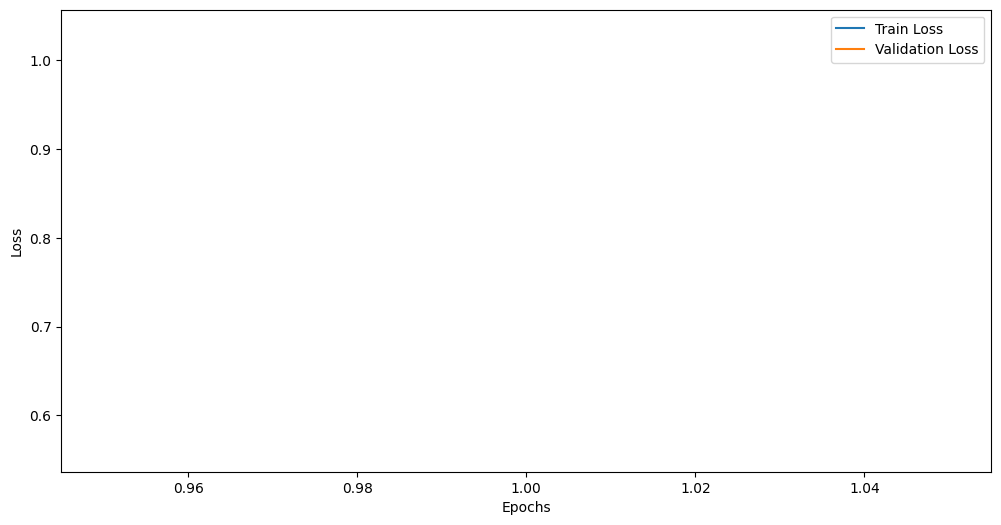

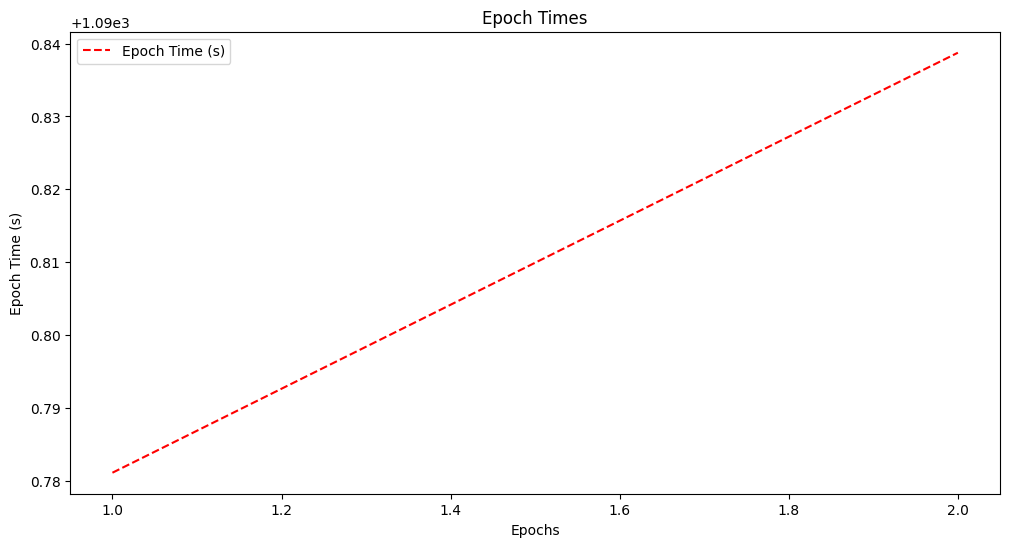

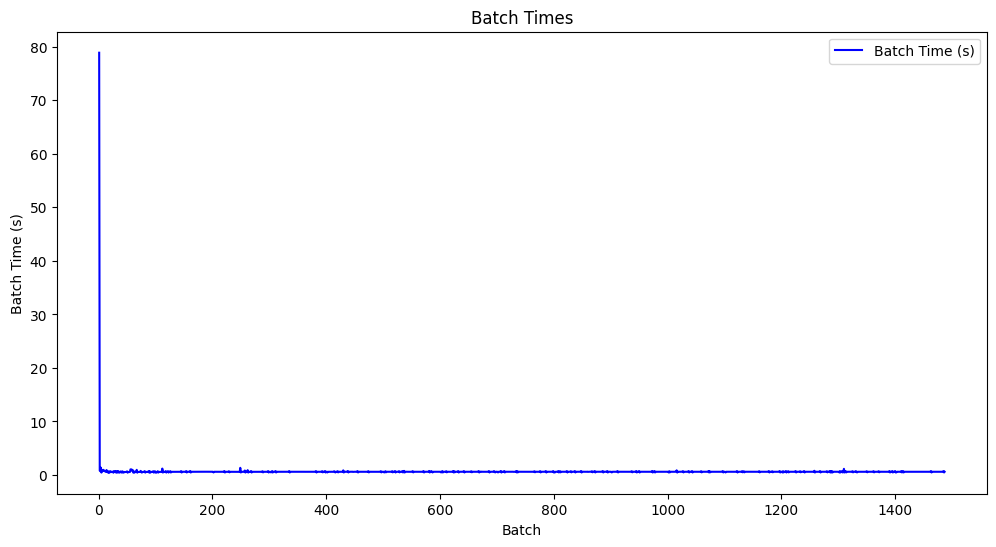

In [34]:
# Restore from the latest checkpoint
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

# Start training and validating
train_and_validate(encoder, decoder, train_dataset, val_dataset, EPOCHS, steps_per_epoch, val_steps_per_epoch)


In [35]:
# Function to plot attention weights
def plot_attention(attention, sentence, predicted_sentence):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(1, 1, 1)
    ax.matshow(attention, cmap='viridis')
    fontdict = {'fontsize': 14}
    ax.set_xticklabels([''] + sentence, fontdict=fontdict, rotation=90)
    ax.set_yticklabels([''] + predicted_sentence, fontdict=fontdict)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    plt.show()

In [36]:
def word_error_rate(reference_tokens, result_tokens):
    # Create a matrix to store edit distances
    dp = [[0] * (len(result_tokens) + 1) for _ in range(len(reference_tokens) + 1)]

    # Initialize the matrix
    for i in range(len(reference_tokens) + 1):
        dp[i][0] = i
    for j in range(len(result_tokens) + 1):
        dp[0][j] = j

    # Compute edit distances
    for i in range(1, len(reference_tokens) + 1):
        for j in range(1, len(result_tokens) + 1):
            cost = 0 if reference_tokens[i - 1] == result_tokens[j - 1] else 1
            dp[i][j] = min(
                dp[i - 1][j] + 1,  # Deletion
                dp[i][j - 1] + 1,  # Insertion
                dp[i - 1][j - 1] + cost  # Substitution
            )

    # WER is the normalized edit distance
    wer = dp[len(reference_tokens)][len(result_tokens)] / len(reference_tokens)
    return wer

In [37]:
import nltk
from nltk.translate.bleu_score import corpus_bleu
nltk.download('wordnet')
from nltk.translate.meteor_score import meteor_score

def calculate_scores(reference, result, range_min=0, range_max=1):
    # Calculate BLEU score
    bleu_score = corpus_bleu([[reference.split()]], [result.split()])

    # Scale the BLEU score to the desired range
    scaled_bleu_score = range_min + (range_max - range_min) * bleu_score

    # Tokenize predicted translation and reference translation
    result_tokens = result.split()
    reference_tokens = reference.split()

    # Calculate METEOR score
    meteor = meteor_score([reference_tokens], result_tokens)

    # Calculate WER
    wer = word_error_rate(reference_tokens, result_tokens)

    return bleu_score, meteor, wer

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [38]:
# Function to evaluate a single sentence translation
def evaluate(sentence, reference):
    # Initialize an array to store attention weights
    attention_plot = np.zeros((max_length_trg, max_length_src))

    # Preprocess the input sentence
    sentence = preprocess_text(sentence)
    # Convert words in the sentence to their corresponding indices
    inputs = [src_lang_tokenizer.word_index[i] for i in sentence.split(' ')]
    # Pad the sequences to a fixed length
    inputs = pad_sequences([inputs], maxlen=max_length_src, padding='post')
    # Convert inputs to TensorFlow tensors
    inputs = tf.convert_to_tensor(inputs)

    # Initialize the output string
    result = ''
    # Initialize the hidden state of the encoder
    hidden = [tf.zeros((1, units))]
    # Get the encoder output and hidden state
    enc_out, enc_hidden = encoder(inputs, hidden)

    # Set the initial input of the decoder to the start token
    dec_hidden = enc_hidden
    dec_input = tf.expand_dims([tgt_lang_tokenizer.word_index['<sos>']], 0)

    # Loop through the maximum target length
    for t in range(max_length_trg):
        # Get the predictions, decoder hidden state, and attention weights from the decoder
        predictions, dec_hidden, attention_weights = decoder(dec_input, dec_hidden, enc_out)
        # Reshape the attention weights
        attention_weights = tf.reshape(attention_weights, (-1,))
        # Store the attention weights
        attention_plot[t] = attention_weights.numpy()
        # Get the predicted word index
        predicted_id = tf.argmax(predictions[0]).numpy()
        # Append the predicted word to the result string
        result += tgt_lang_tokenizer.index_word[predicted_id] + ' '

        # Break if the end token is predicted
        if tgt_lang_tokenizer.index_word[predicted_id] == '<eos>':
            break
        # Update the decoder input to the predicted word index
        dec_input = tf.expand_dims([predicted_id], 0)

    # Calculate evaluation metrics (BLEU, METEOR, Word Error Rate) for the translation
    bleu_score, meteor, wer = calculate_scores(reference, result)

    return result, sentence, attention_plot, bleu_score, meteor, wer


In [39]:
# Function to translate a sentence and evaluate its translation
def translate_and_evaluate(sentence, reference):
    # Perform evaluation of the sentence
    result, sentence, attention_plot, bleu_score, meteor, wer = evaluate(sentence, reference)

    # Print the input, predicted translation, and reference translation
    print('Input:', sentence)
    print('Predicted Translation:', result)
    print('Reference Translation:', reference)
    # Print the evaluation scores
    print('BLEU Score:', bleu_score)
    print('METEOR Score:', meteor)
    print('Word Error Rate Score:', wer)

    # Adjust the size of the attention plot and plot the attention weights
    attention_plot = attention_plot[:len(result.split(' ')), :len(sentence.split(' '))]
    plot_attention(attention_plot, sentence.split(' '), result.split(' '))

    return bleu_score, meteor, wer

In [40]:
# Restore the latest checkpoint for the model
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

In [41]:
# Function to calculate average scores over multiple translations
def calculate_average_scores(translations, references):
    total_bleu = 0
    total_meteor = 0
    total_wer = 0
    num_samples = len(translations)

    # Loop over all translations and references
    for sentence, reference in zip(translations, references):
        # Translate and evaluate each sentence
        bleu_score, meteor, wer = translate_and_evaluate(sentence, reference)
        # Sum up the scores
        total_bleu += bleu_score
        total_meteor += meteor
        total_wer += wer

    # Calculate the average scores
    average_bleu = total_bleu / num_samples
    average_meteor = total_meteor / num_samples
    average_wer = total_wer / num_samples

    return average_bleu, average_meteor, average_wer



Input: <sos> hace mucho frio aqui . <eos>
Predicted Translation: it is very happy . <eos> 
Reference Translation: It s very cold here . <eos>
BLEU Score: 7.100514228897259e-155
METEOR Score: 0.4574275362318841
Word Error Rate Score: 0.5714285714285714


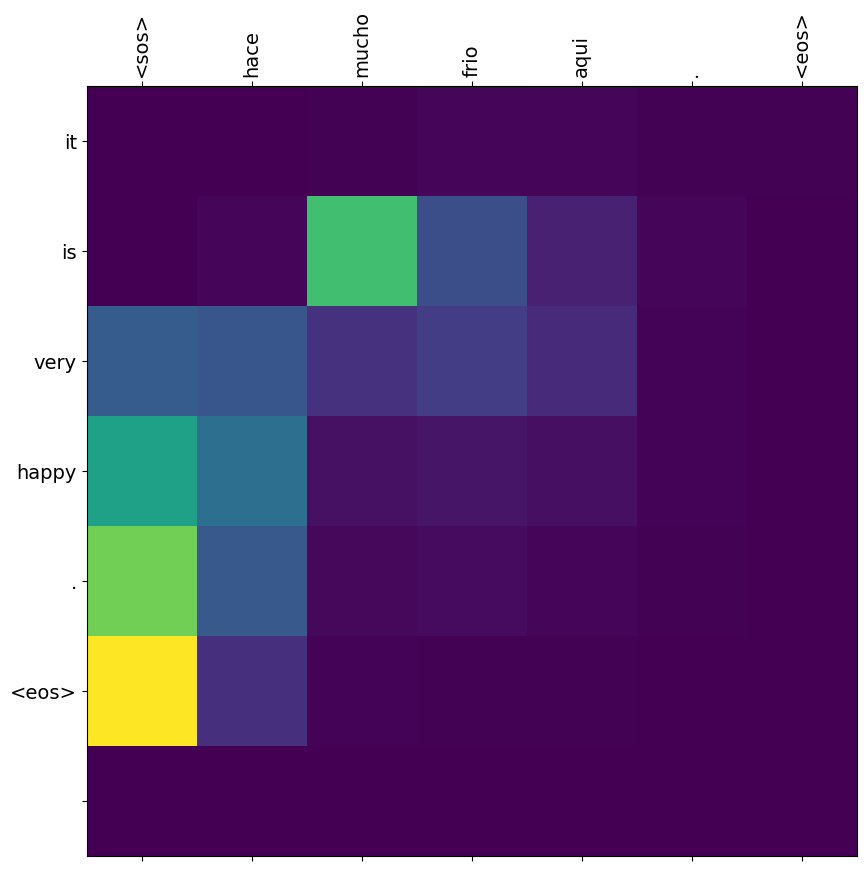

Input: <sos> tengo miedo a los fantasmas . <eos>
Predicted Translation: i m going to go to the party . <eos> 
Reference Translation: I m afraid of ghosts . <eos>
BLEU Score: 6.373704167435469e-155
METEOR Score: 0.5136986301369862
Word Error Rate Score: 1.0


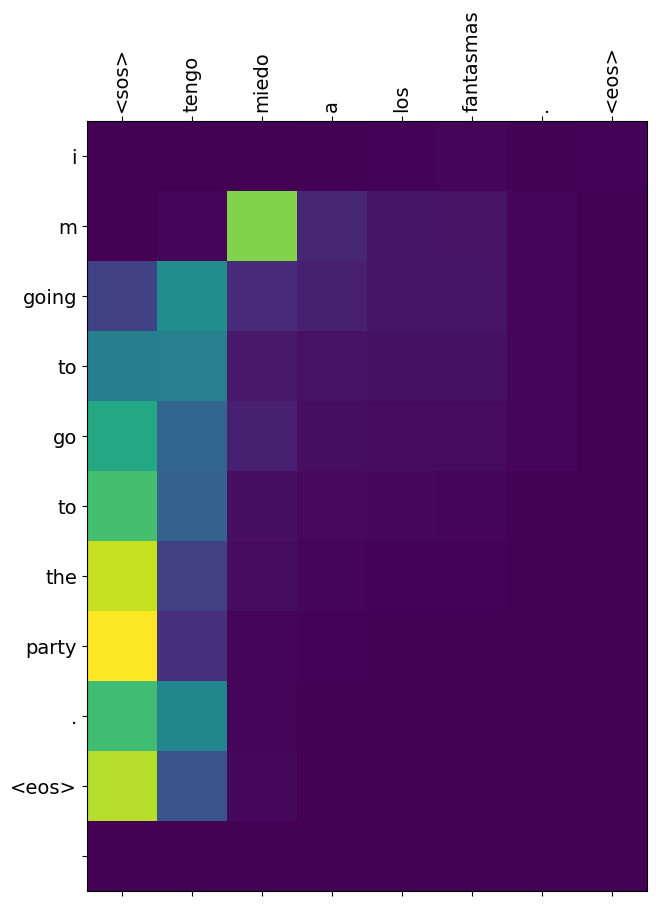

Input: <sos> ¿ todavia estan en casa ? <eos>
Predicted Translation: is there a doctor ? <eos> 
Reference Translation: are you still at home ? <eos>
BLEU Score: 6.416038883891965e-155
METEOR Score: 0.2717391304347826
Word Error Rate Score: 0.7142857142857143


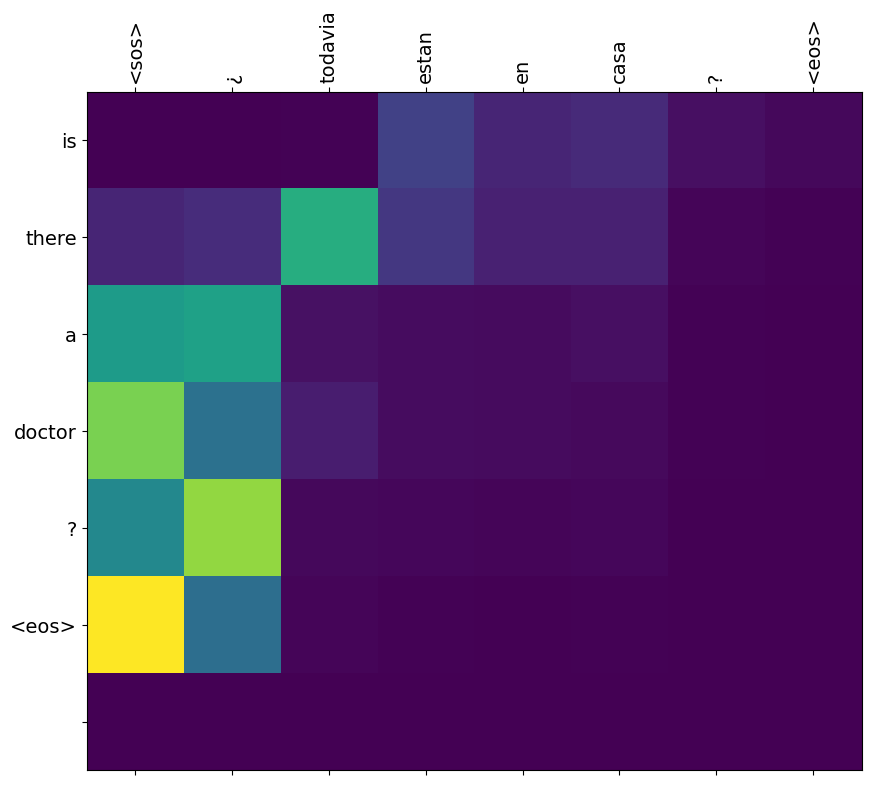

Input: <sos> la arana me pico . <eos>
Predicted Translation: the police had a lot of the city . <eos> 
Reference Translation: the spider bit me . <eos>
BLEU Score: 6.373704167435469e-155
METEOR Score: 0.3993055555555556
Word Error Rate Score: 1.1666666666666667


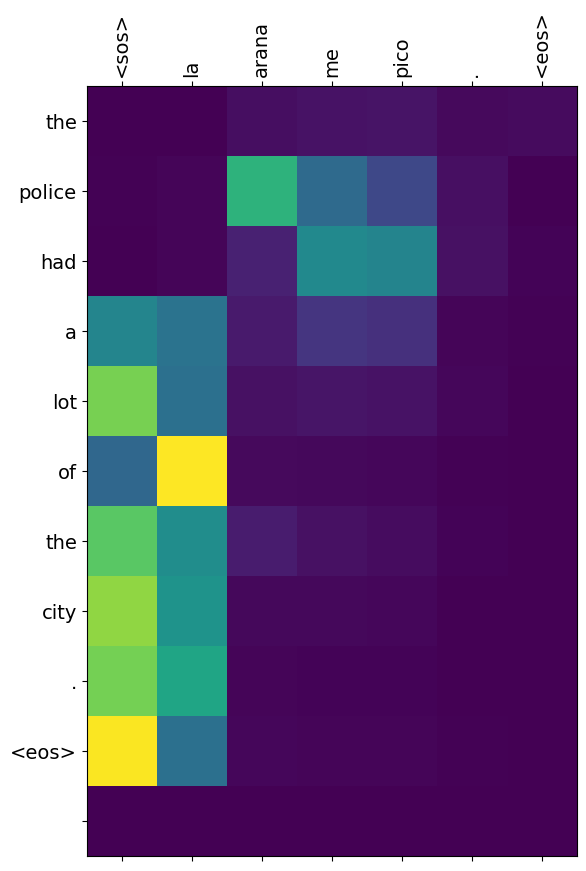

Input: <sos> ¿ le tienes miedo a la oscuridad ? . <eos>
Predicted Translation: do you know how to do that ? <eos> 
Reference Translation: Are you afraid of the dark ? <eos>
BLEU Score: 6.7393716283177006e-155
METEOR Score: 0.3155006858710563
Word Error Rate Score: 0.75


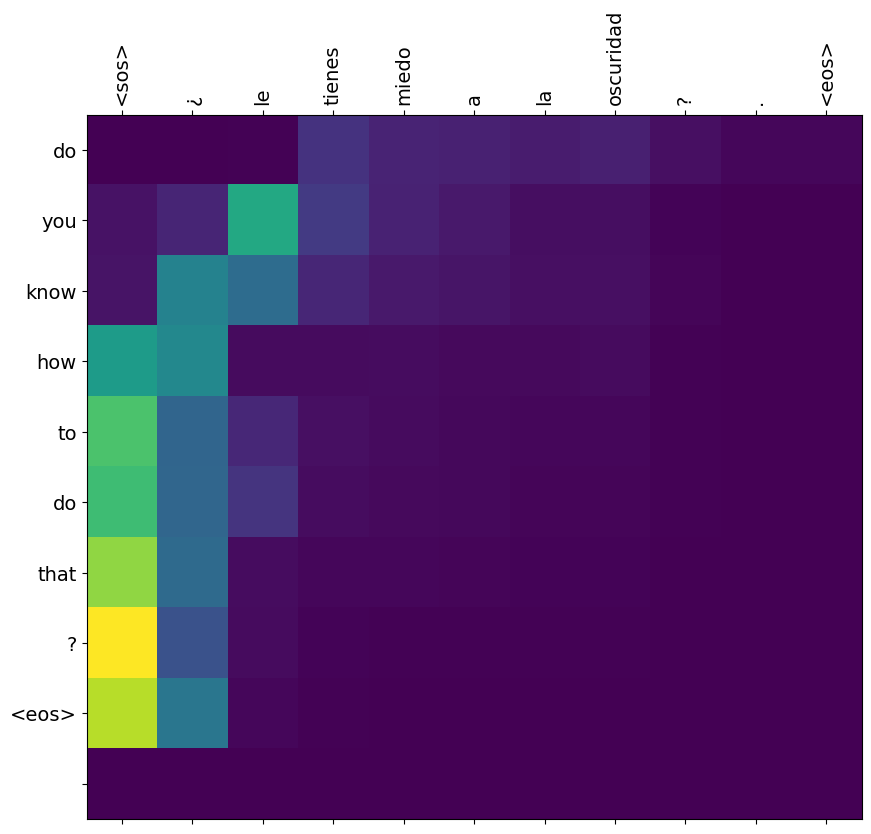

Input: <sos> eso fue lo ultimo que escuche antes de que la luz se apago . <eos>
Predicted Translation: it was always what i m going to me . <eos> 
Reference Translation: That was the last thing I heard before the light turned off . <eos>
BLEU Score: 4.6148799560977726e-155
METEOR Score: 0.2715328467153285
Word Error Rate Score: 0.7857142857142857


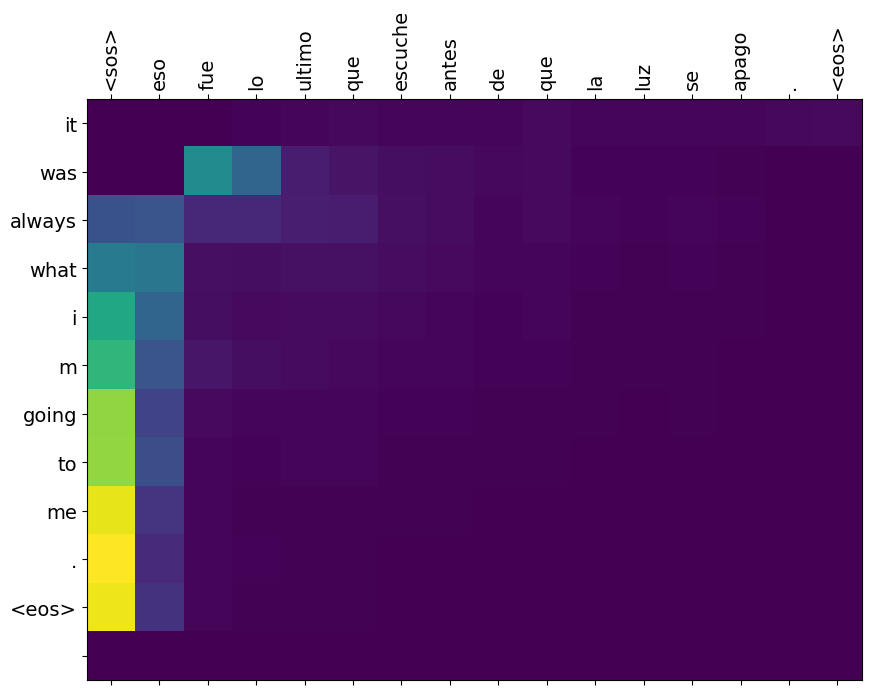

Input: <sos> mientras camino a traves del valle de la sombra de la muerte <eos>
Predicted Translation: let s two people have a lot of the door , please . <eos> 
Reference Translation: As I walk through the valley of the shadow of death . <eos>
BLEU Score: 6.830096904817037e-155
METEOR Score: 0.24093511450381686
Word Error Rate Score: 0.7692307692307693


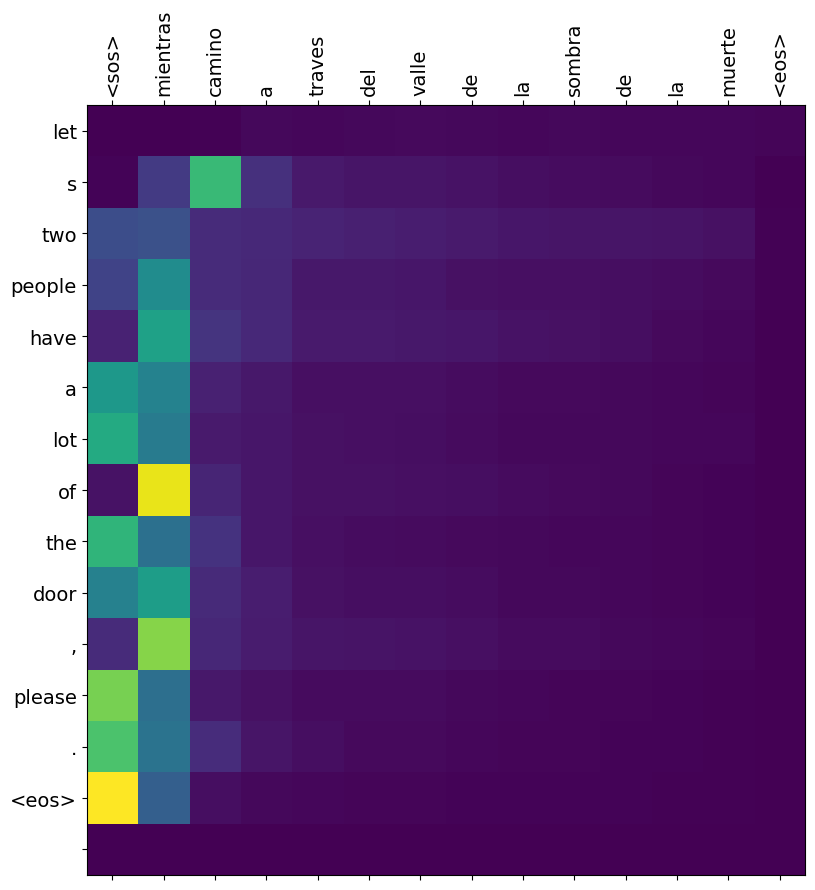

Input: <sos> cuanto mas he de esperar , <eos>
Predicted Translation: what tom is a lot of the book . <eos> 
Reference Translation: How much more do I have to wait ,
BLEU Score: 0
METEOR Score: 0.0
Word Error Rate Score: 1.1111111111111112


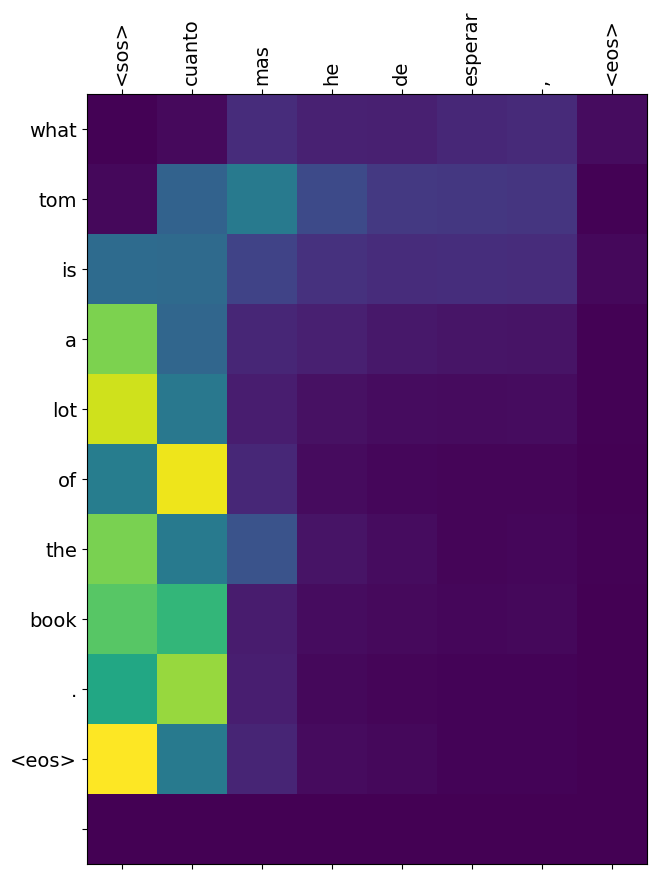

Input: <sos> cuanto mas he de buscar , <eos>
Predicted Translation: what tom is a lot of the book . <eos> 
Reference Translation: how much more do I have to search ,
BLEU Score: 0
METEOR Score: 0.0
Word Error Rate Score: 1.1111111111111112


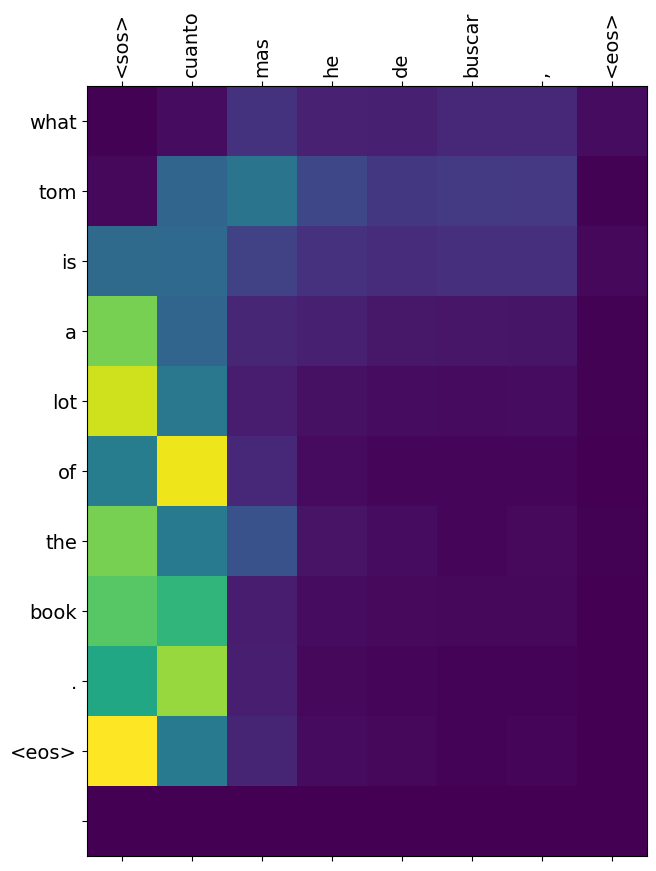

Input: <sos> para poder encontrar la luz que se que hay en mi . <eos>
Predicted Translation: let s what s one , i ll be more , i m going to do that . <eos> 
Reference Translation: to be able to find the light that I know is in me .
BLEU Score: 1.2340561512781763e-231
METEOR Score: 0.17241379310344826
Word Error Rate Score: 1.2857142857142858


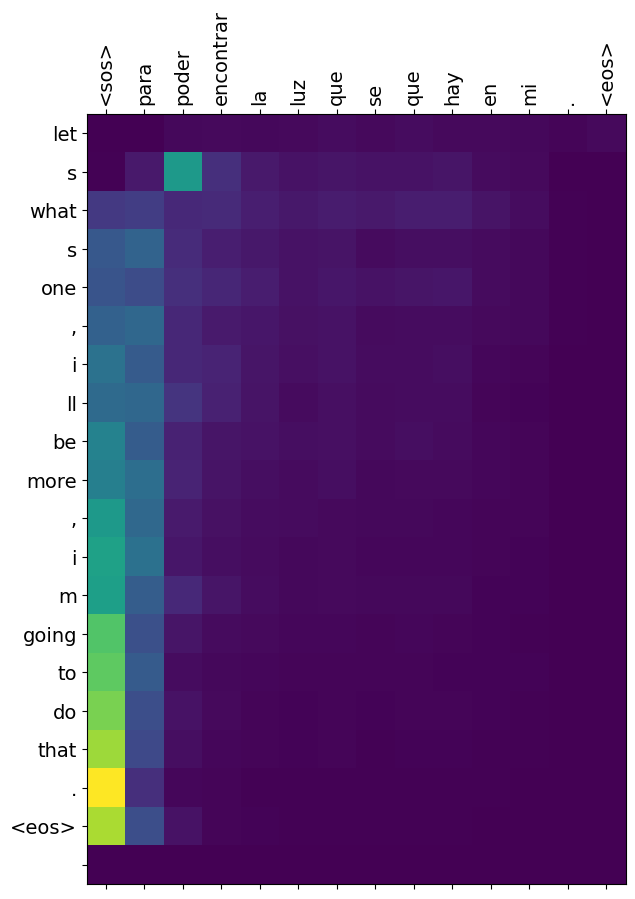

Input: <sos> he vivido en soledad rodeado de multitud , <eos>
Predicted Translation: i have a lot of the truth . <eos> 
Reference Translation: I ve lived in loneliness surrounded by crowd ,
BLEU Score: 0
METEOR Score: 0.05555555555555555
Word Error Rate Score: 1.0


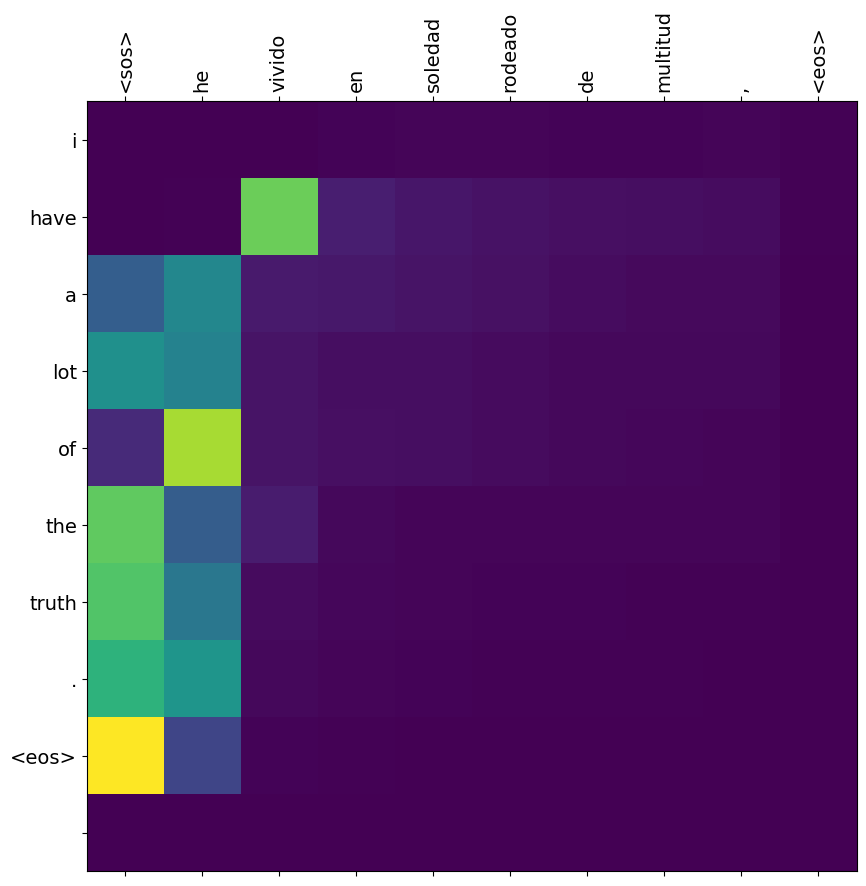

Input: <sos> nunca he conseguido amar pues no me quiero ni yo . <eos>
Predicted Translation: i don t want to do that i m . <eos> 
Reference Translation: I ve never been able to love because I don t even love myself .
BLEU Score: 4.528076715110988e-155
METEOR Score: 0.2920471841704718
Word Error Rate Score: 0.9333333333333333


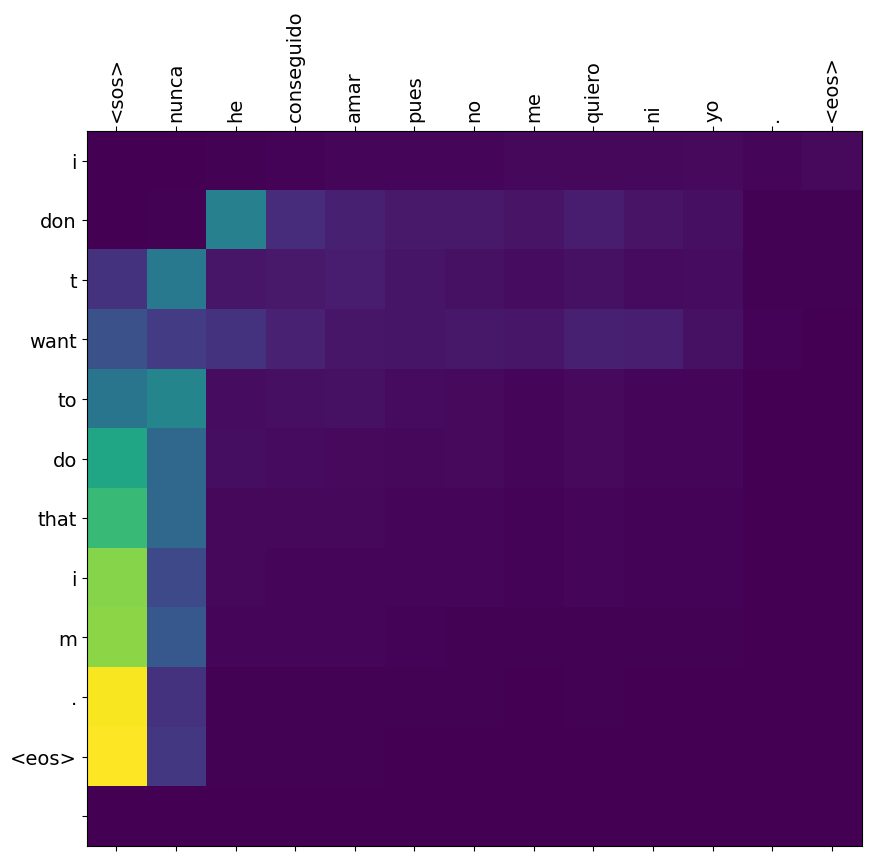

Input: <sos> cuando veas una estrella fugaz guarda en tu corazon , <eos>
Predicted Translation: please give me a lot of the book . <eos> 
Reference Translation: When you see a shooting star save it in your heart ,
BLEU Score: 8.387826279040936e-232
METEOR Score: 0.0423728813559322
Word Error Rate Score: 0.9166666666666666


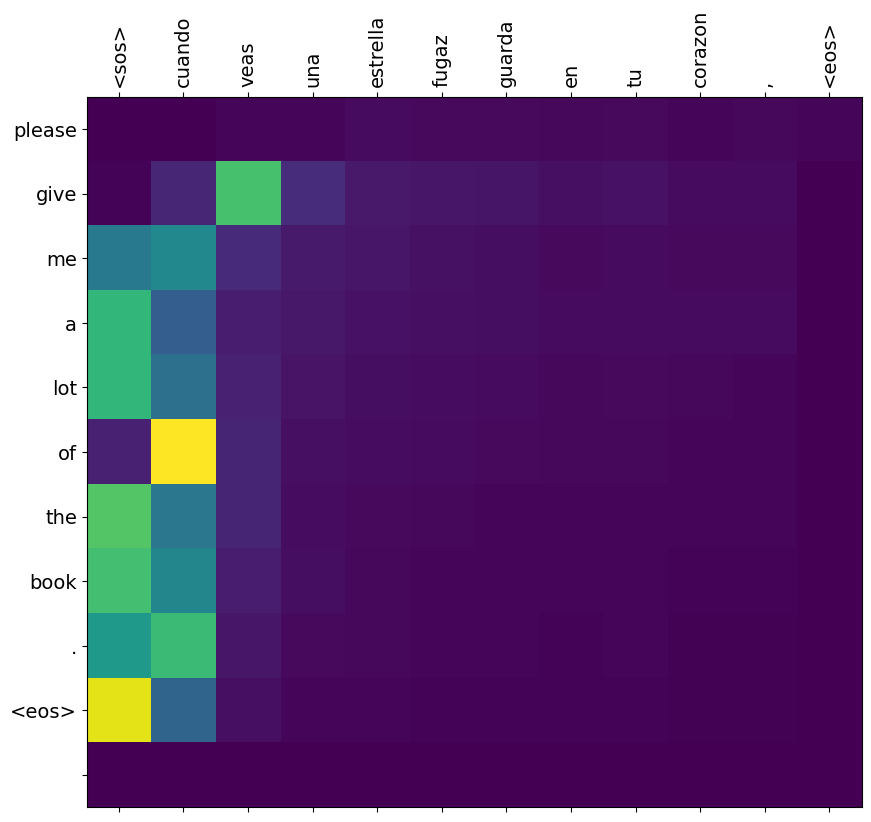

Input: <sos> es el alma de alguien que consiguio dar a los suyos su amor . <eos>
Predicted Translation: it s a good than a lot of the same idea . <eos> 
Reference Translation: it s the soul of someone who managed to give his love to his beloved .
BLEU Score: 5.010854169466314e-155
METEOR Score: 0.23694267515923564
Word Error Rate Score: 0.875


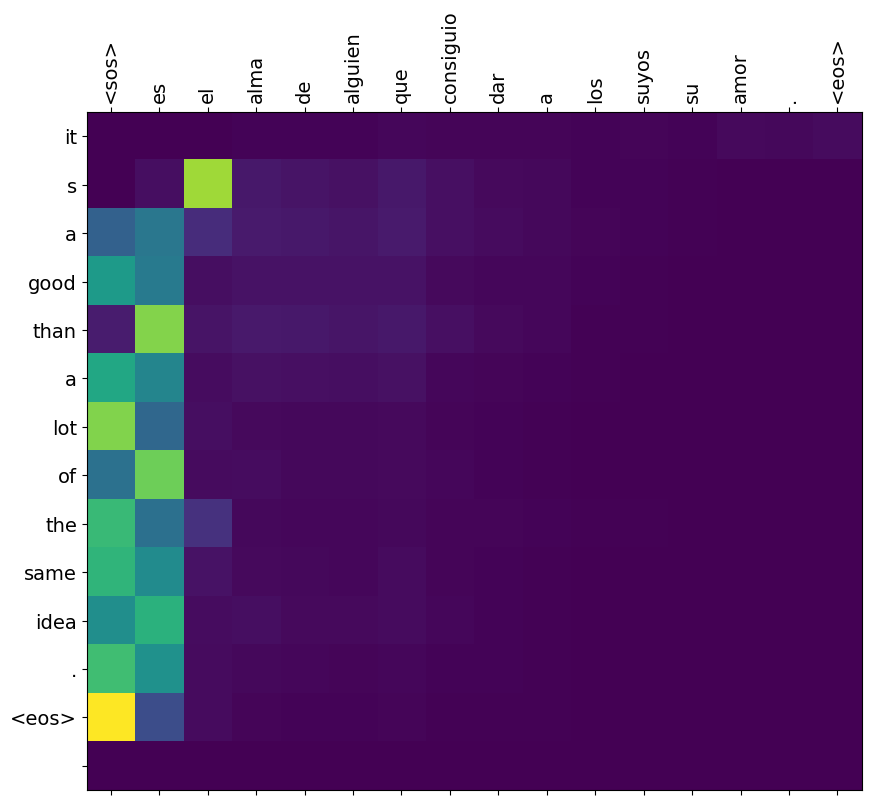

Input: <sos> cuando oigas a un nino preguntar por que el sol viene y se va , <eos>
Predicted Translation: let me the best , i ll be a lot of the book . <eos> 
Reference Translation: When you hear a child ask why the sun comes and goes ,
BLEU Score: 1.2183324802375697e-231
METEOR Score: 0.11363636363636363
Word Error Rate Score: 1.1538461538461537


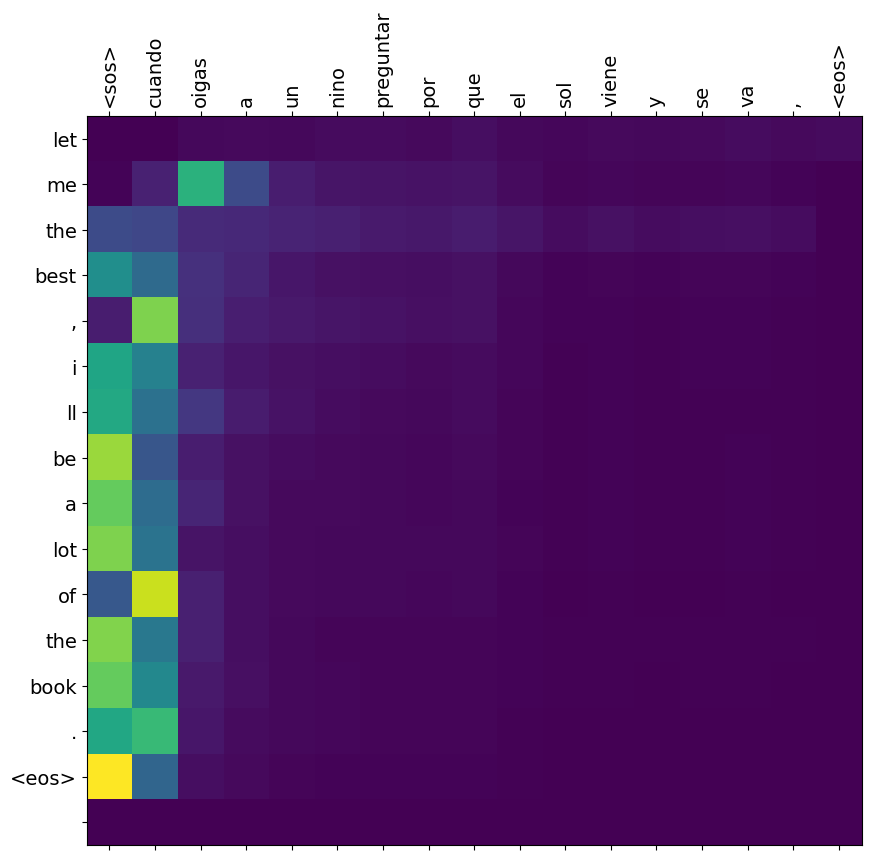

Input: <sos> dile porque en esta vida no hay luz sin oscuridad . <eos>
Predicted Translation: excuse me , i ll be a lot of tom . <eos> 
Reference Translation: tell him : because in this life there isn t light without darkness .
BLEU Score: 8.285726588482745e-232
METEOR Score: 0.036231884057971016
Word Error Rate Score: 1.0


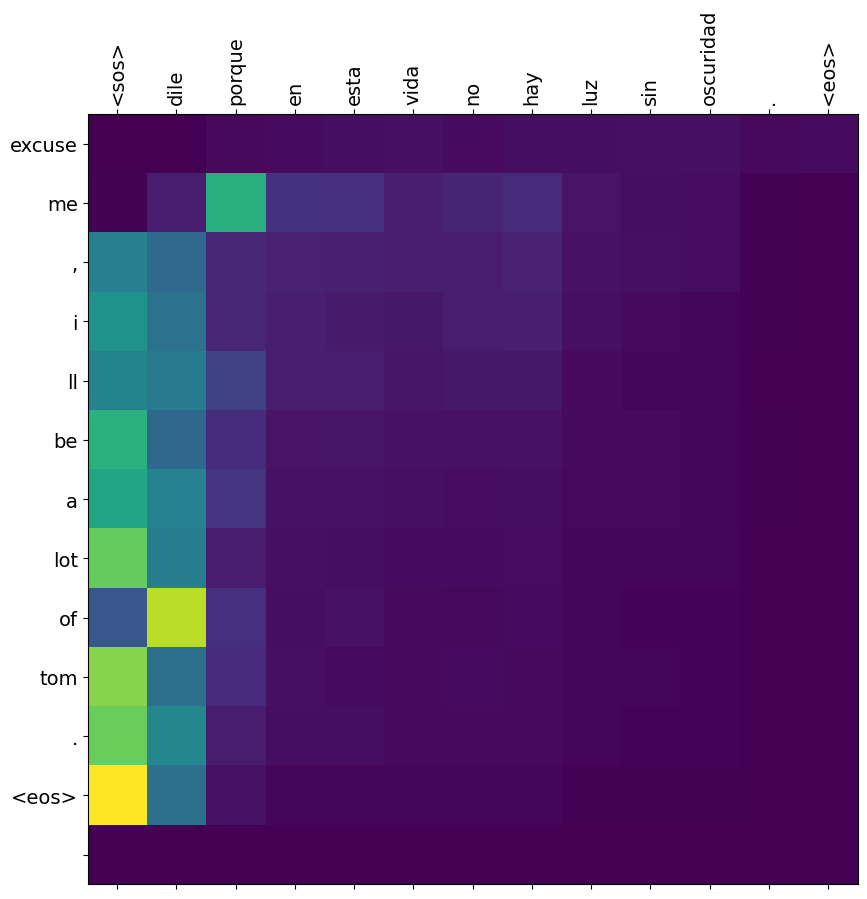

Input: <sos> si eres capaz de devolver con una sonrisa una traicion , <eos>
Predicted Translation: you can be too late for you . <eos> 
Reference Translation: If you are able to respond to a betrayal with a smile ,
BLEU Score: 6.744160953836975e-232
METEOR Score: 0.03968253968253969
Word Error Rate Score: 0.9230769230769231


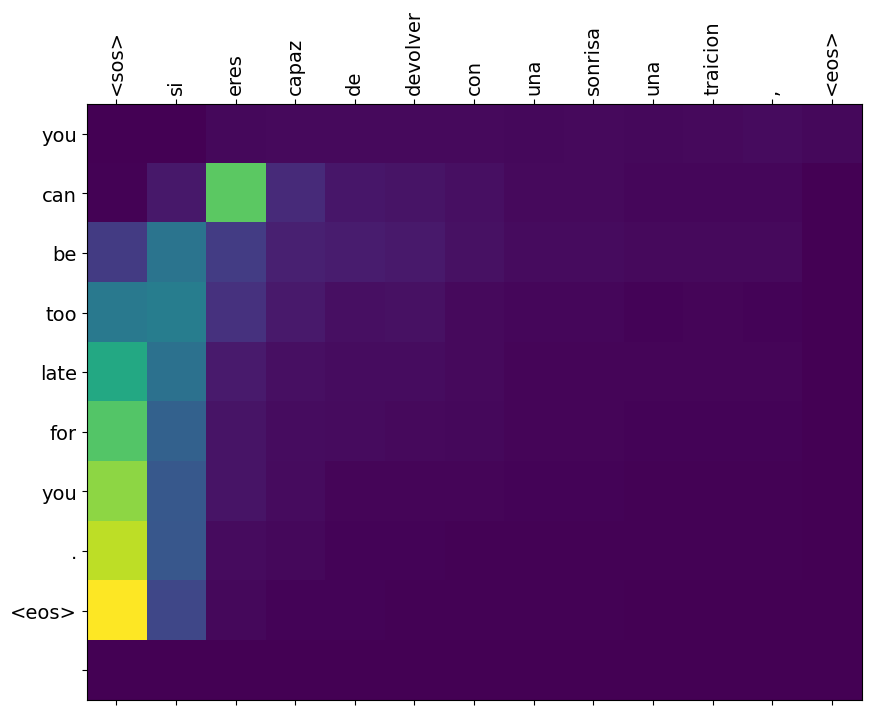

Input: <sos> si eres capaz de dar tu mano a quien con la suya te senalo . <eos>
Predicted Translation: you can be here , but i m going to me . <eos> 
Reference Translation: If you are able to lend your hand to whom pointed his at you .
BLEU Score: 1.0826504568327566e-231
METEOR Score: 0.10135135135135136
Word Error Rate Score: 0.9333333333333333


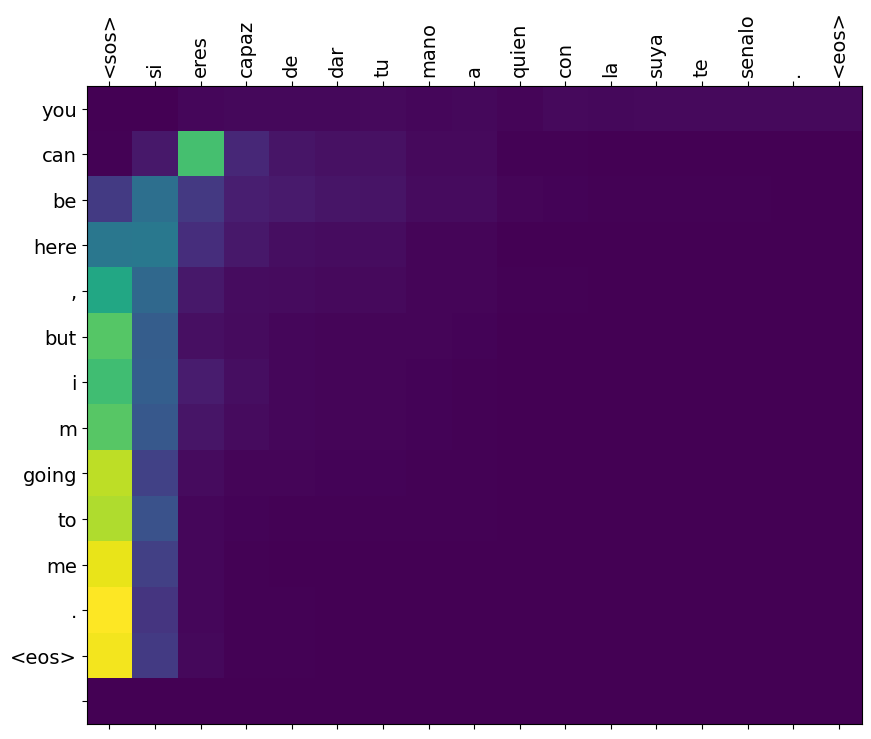

Input: <sos> no eches raices en un sitio , <eos>
Predicted Translation: i don t know where tom . <eos> 
Reference Translation: Don t take root in a place ,
BLEU Score: 1.0832677820940877e-231
METEOR Score: 0.234375
Word Error Rate Score: 1.0


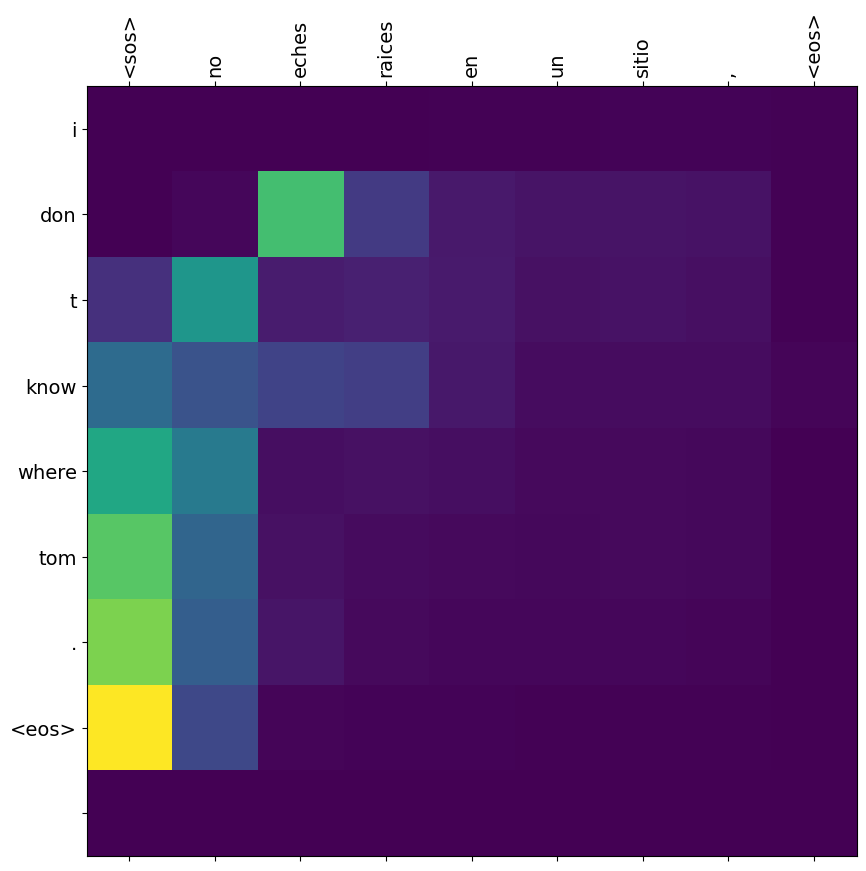

Input: <sos> muevete pues no eres un arbol , <eos>
Predicted Translation: these not not not not a lot of tom . <eos> 
Reference Translation: move on because you're not a tree ,
BLEU Score: 5.477489369001354e-155
METEOR Score: 0.22590361445783136
Word Error Rate Score: 1.125


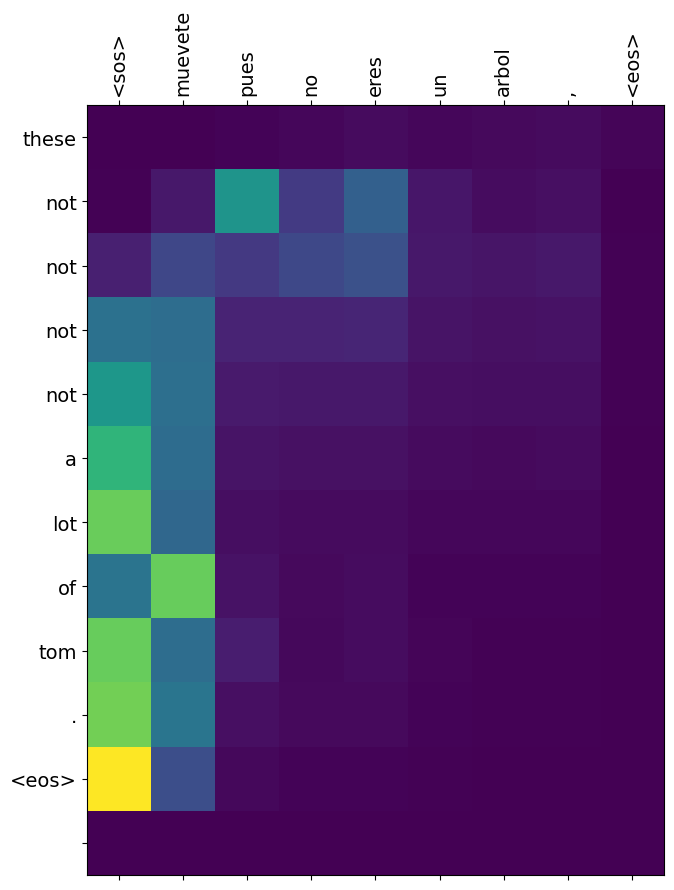

Input: <sos> para eso tienes dos pies . <eos>
Predicted Translation: we re going to do it . <eos> 
Reference Translation: that s why you have two feet .
BLEU Score: 1.0832677820940877e-231
METEOR Score: 0.0625
Word Error Rate Score: 1.0


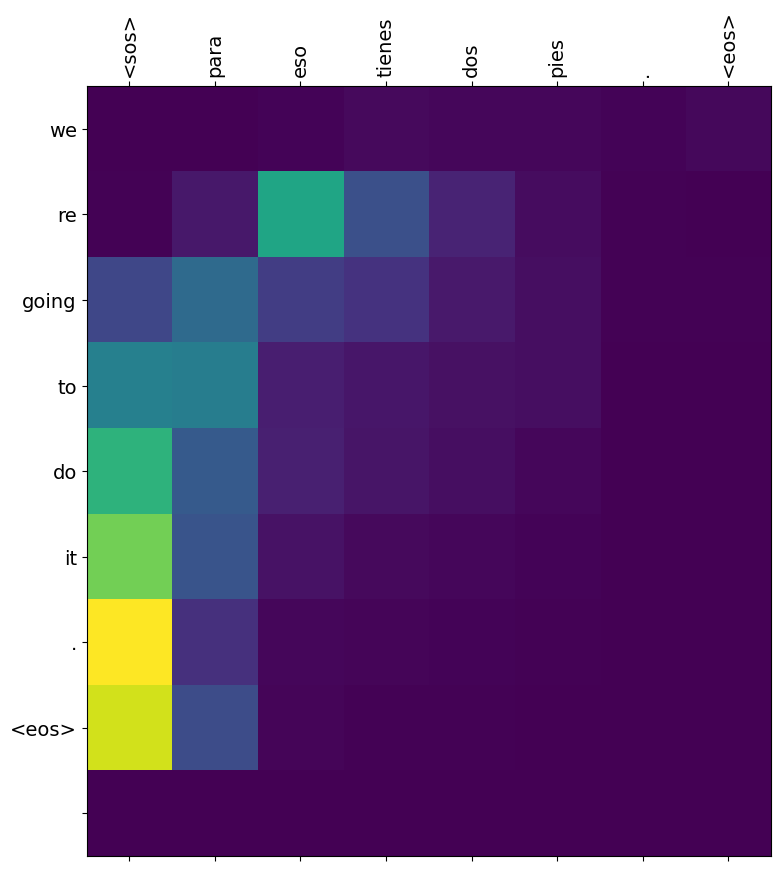

Input: <sos> el hombre mas sabio es el que sabe que su hogar es tan grande como pueda imaginar . <eos>
Predicted Translation: the dog is very very very very very very very very very very very very very very very very very very very very very very very very very very very very very very very very very very very very very very very very very very very very very very very very 
Reference Translation: The wisest man is the one who knows that his home is as big as he can imagine it.
BLEU Score: 8.107244643554327e-232
METEOR Score: 0.04504504504504504
Word Error Rate Score: 2.6842105263157894


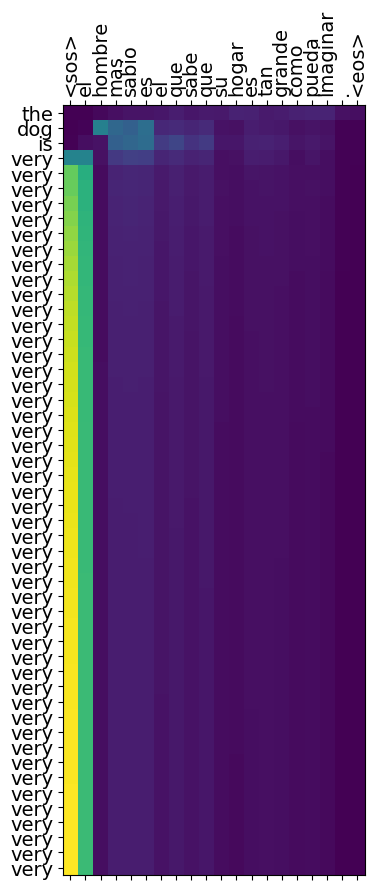

Input: <sos> cuando veas una estrella fugaz <eos>
Predicted Translation: please give me a lot of the party . <eos> 
Reference Translation: When you see a shooting star 
BLEU Score: 1.0244914152188952e-231
METEOR Score: 0.078125
Word Error Rate Score: 1.5


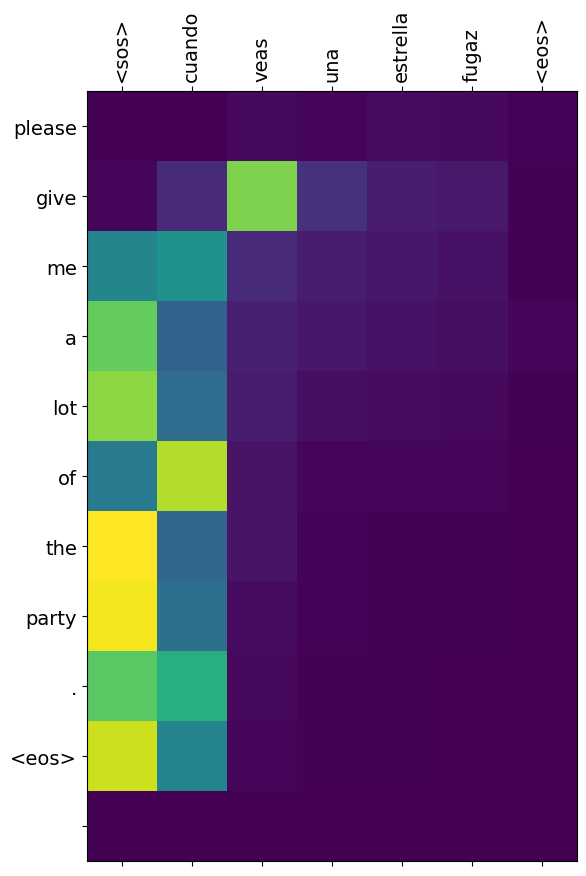

Input: <sos> el mejor dia es en el que el alma tiene hambre y sed . <eos>
Predicted Translation: the cat is very very very good than he is a doctor . <eos> 
Reference Translation: The best day is that in which the soul is hungry and thirsty .
BLEU Score: 1.331960397810445e-231
METEOR Score: 0.14285714285714285
Word Error Rate Score: 0.9285714285714286


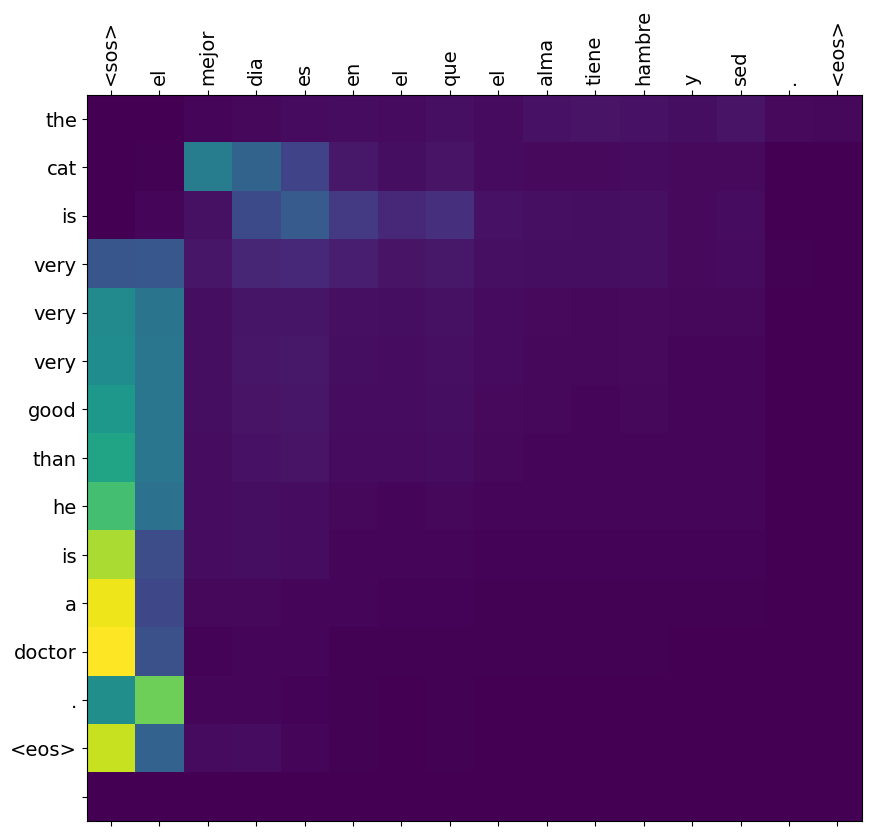

Input: <sos> no olvides lo aprendido , no dejes de comprender . <eos>
Predicted Translation: don t be not a doctor . <eos> 
Reference Translation: Don t forget what you learned , don t stop understanding .
BLEU Score: 4.352695452391273e-155
METEOR Score: 0.22030651340996166
Word Error Rate Score: 0.9166666666666666


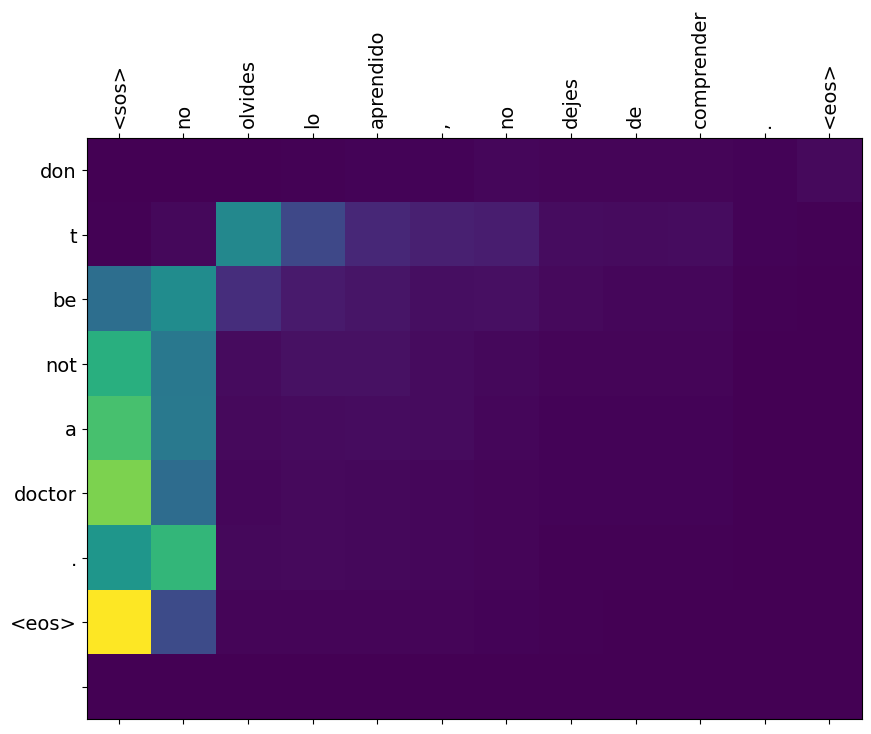

Input: <sos> rodeado de buenos y tu lo pareces . <eos>
Predicted Translation: we ll be a lot of the book . <eos> 
Reference Translation: Surround yourself by good ones and you will seem one .
BLEU Score: 9.269981669466712e-232
METEOR Score: 0.045871559633027525
Word Error Rate Score: 1.0


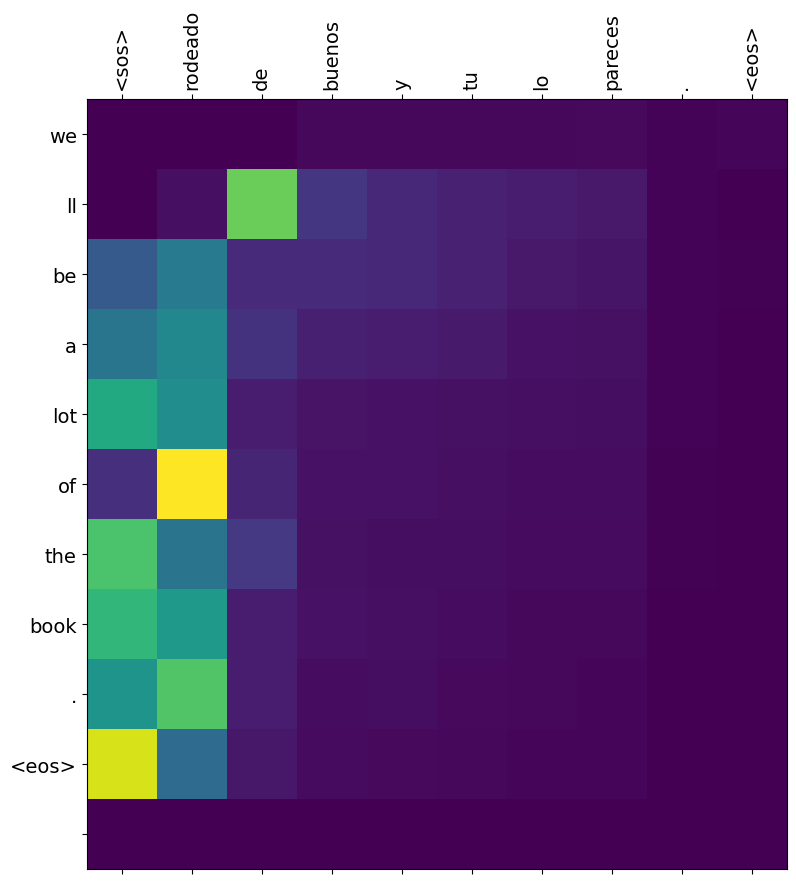

Input: <sos> rodeado de sabios y algo en ti se quedara . <eos>
Predicted Translation: we ll be a lot of the book for a lot of the party . <eos> 
Reference Translation: Surround yourself by wise ones and something will remain in you .
BLEU Score: 9.109159947227211e-232
METEOR Score: 0.040322580645161296
Word Error Rate Score: 1.25


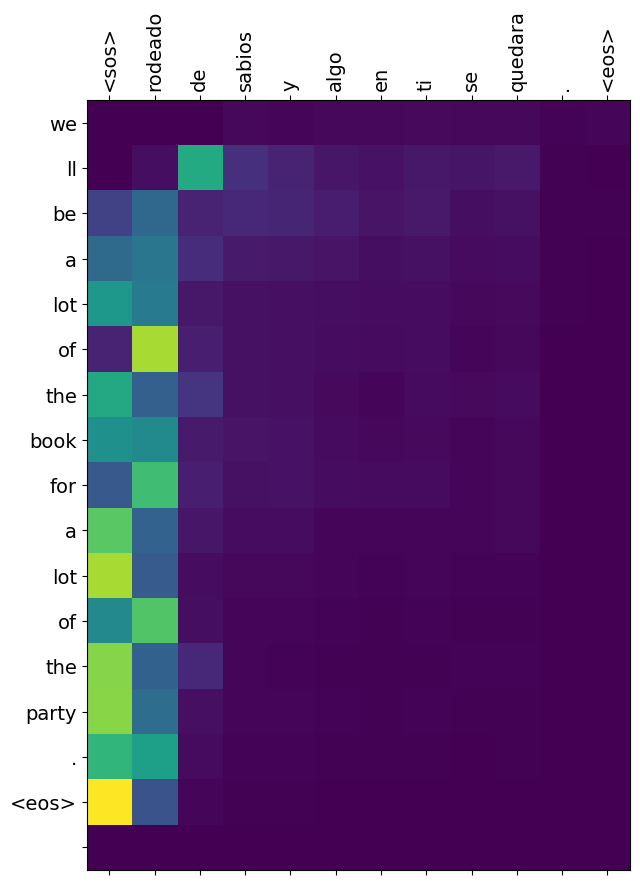

Input: <sos> cuando veas una estrella fugaz <eos>
Predicted Translation: please give me a lot of the party . <eos> 
Reference Translation: When you see a shooting star
BLEU Score: 1.0244914152188952e-231
METEOR Score: 0.078125
Word Error Rate Score: 1.5


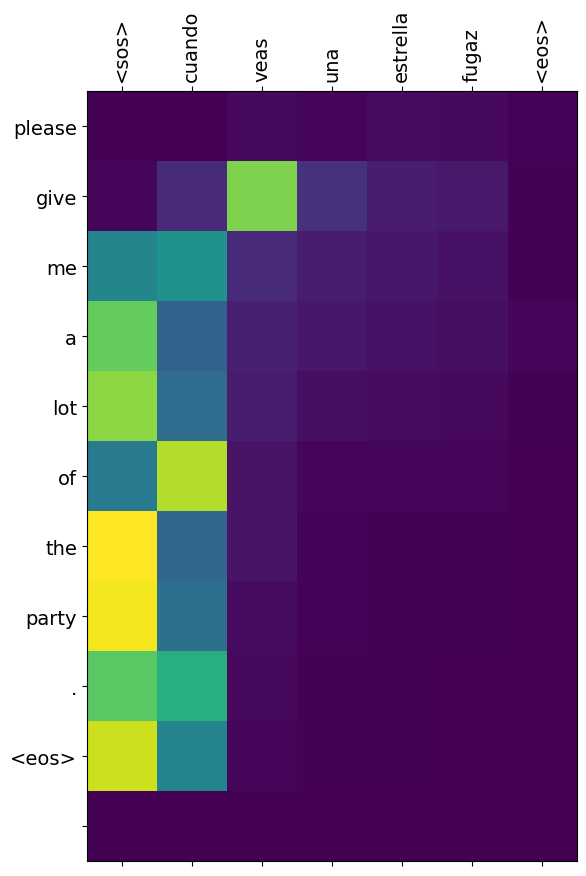

Average BLEU Score: 2.2791937729593787e-155
Average METEOR Score: 0.1690644708418018
Average wer Score: 1.0680345552526003


In [42]:
translations = [
    u'hace mucho frío aquí.',
    u'tengo miedo a los fantasmas.',
    u'¿todavía están en casa?',
    u'la araña me pico.',
    u'¿Le tienes miedo a la oscuridad?.',
    u'Eso fue lo último que escuché antes de que la luz se apago.',
    u'Mientras camino a través del valle De la sombra de la muerte ',

    u'Cuánto más he de esperar, ',
    u'cuánto más he de buscar, ',
    u'para poder encontrar la luz que sé que hay en mí.',

    u'He vivido en soledad rodeado de multitud,',
    u'nunca he conseguido amar pues no me quiero ni yo.',

    u'Cuando veas una estrella fugaz guarda en tu corazón,',
    u'es el alma de alguien que consiguió dar a los suyos su amor.',

    u'Cuando oigas a un niño preguntar por qué el sol viene y se va, ',
    u'dile : porque en esta vida no hay luz sin oscuridad.',

    u'Si eres capaz de devolver con una sonrisa una traición,',
    u'si eres capaz de dar tu mano a quien con la suya te señaló.',

    u'No eches raíces en un sitio, ',
    u'muévete pues no eres un árbol, ',
    u'para eso tienes dos pies.',
    u'El hombre más sabio es el que sabe que su hogar es tan grande como pueda imaginar.',

    u'Cuando veas una estrella fugaz ',
    u'El mejor día es en el que el alma tiene hambre y sed.',
    u'No olvides lo aprendido, no dejes de comprender.',

    u'rodeado de buenos y tú lo pareces.',
    u'rodeado de sabios y algo en ti se quedará.',
    u' Cuando veas una estrella fugaz'
]

references = [
    "It s very cold here . <eos>",
    "I m afraid of ghosts . <eos>",
    "are you still at home ? <eos>",
    "the spider bit me . <eos>",
    "Are you afraid of the dark ? <eos>",
    "That was the last thing I heard before the light turned off . <eos>",
    "As I walk through the valley of the shadow of death . <eos>",

    "How much more do I have to wait ,",
    "how much more do I have to search ,",
    "to be able to find the light that I know is in me .",

    "I ve lived in loneliness surrounded by crowd ,",
    "I ve never been able to love because I don t even love myself .",

    "When you see a shooting star save it in your heart ,",
    "it s the soul of someone who managed to give his love to his beloved .",

    "When you hear a child ask why the sun comes and goes ,",
    "tell him : because in this life there isn t light without darkness .",

    "If you are able to respond to a betrayal with a smile ,",
    "If you are able to lend your hand to whom pointed his at you .",

    "Don t take root in a place ,",
    "move on because you're not a tree ,",
    "that s why you have two feet .",
    "The wisest man is the one who knows that his home is as big as he can imagine it.",

    "When you see a shooting star ",
    "The best day is that in which the soul is hungry and thirsty .",
    "Don t forget what you learned , don t stop understanding .",

    "Surround yourself by good ones and you will seem one .",
    "Surround yourself by wise ones and something will remain in you .",
    "When you see a shooting star"

]

average_bleu, average_meteor, average_wer = calculate_average_scores(translations, references)
print(f'Average BLEU Score: {average_bleu}')
print(f'Average METEOR Score: {average_meteor}')
print(f'Average wer Score: {average_wer}')
